total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


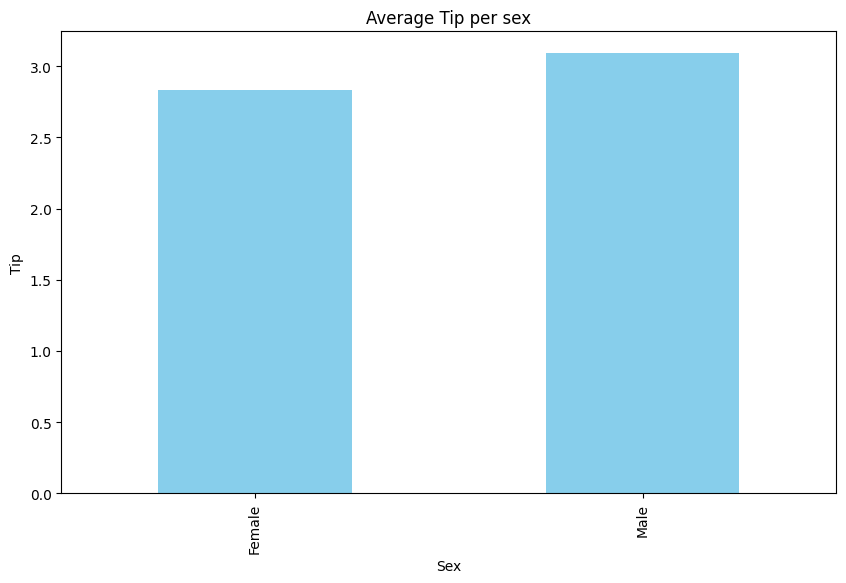

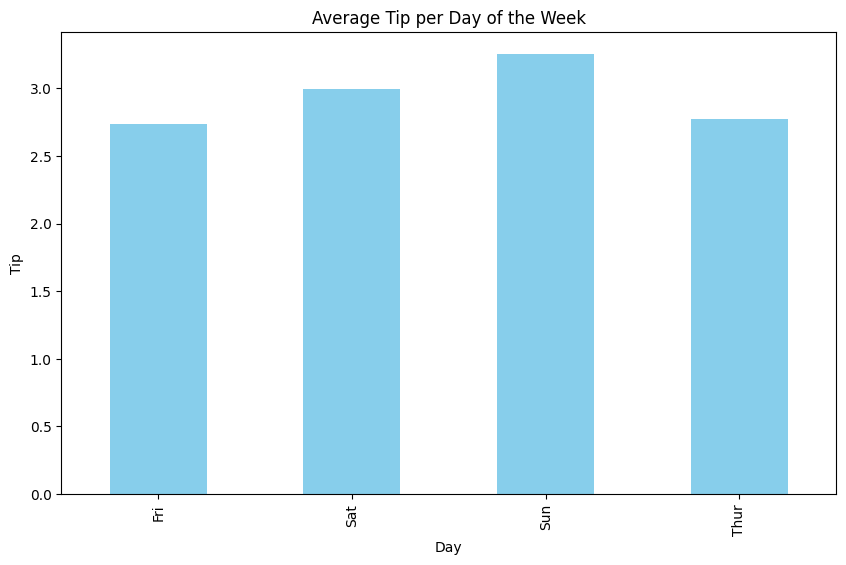

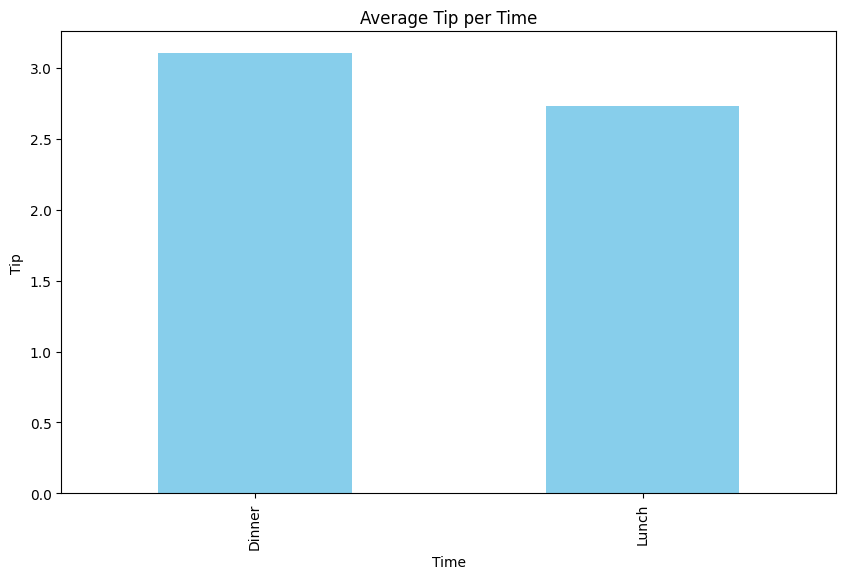

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('-', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()

mean_tip_per_day = df.groupby('day')['tip'].mean()

mean_tip_by_time = df.groupby('time')['tip'].mean()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


print(df.head())

In [33]:
!pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [34]:
conda install pandas

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('-', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()

mean_tip_per_day = df.groupby('day')['tip'].mean()

mean_tip_by_time = df.groupby('time')['tip'].mean()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


print(df.head())

ModuleNotFoundError: No module named 'pandas'

In [5]:
pip3 install pandas

SyntaxError: invalid syntax (3029356636.py, line 1)

In [6]:
pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.5-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.2.5-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


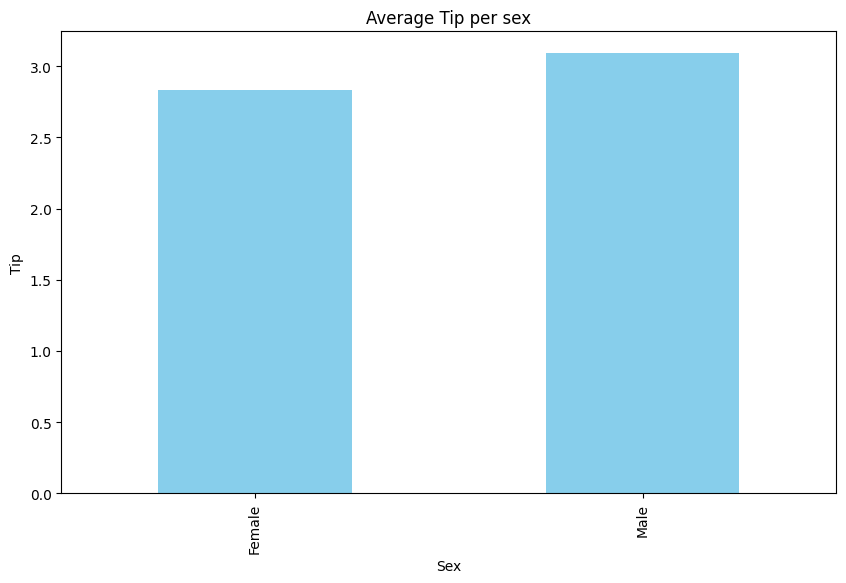

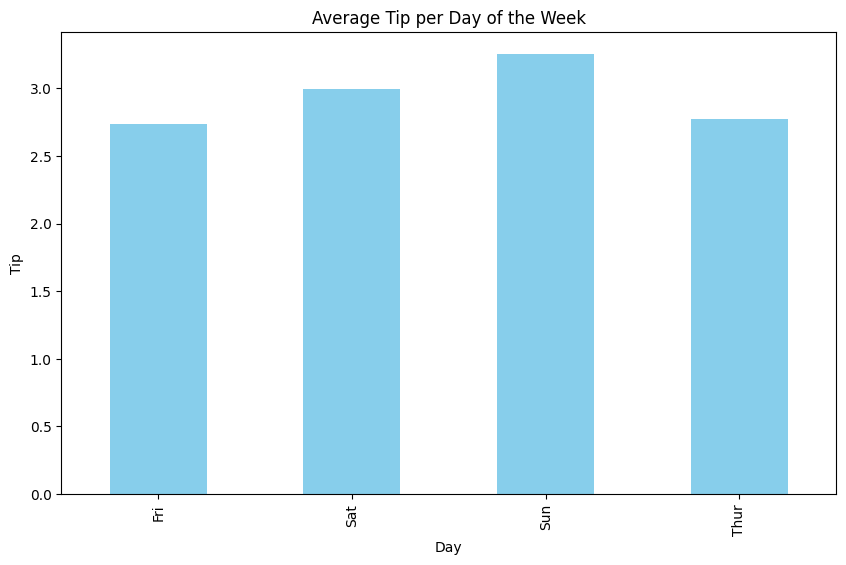

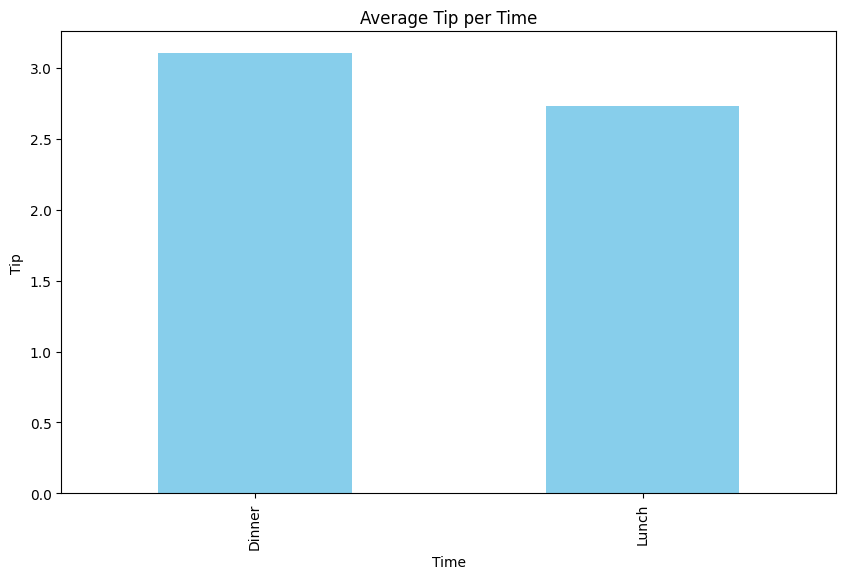

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('-', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()

mean_tip_per_day = df.groupby('day')['tip'].mean()

mean_tip_by_time = df.groupby('time')['tip'].mean()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


print(df.head())

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()

mean_tip_per_day = df.groupby('day')['tip'].mean()

mean_tip_by_time = df.groupby('time')['tip'].mean()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


print(df.head())

SystemError: <class 'numpy.iinfo'> returned a result with an exception set

In [4]:
pip list | grep -E 'pandas|numpy'

numpy                     2.2.5
pandas                    2.2.3
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip uninstall pandas numpy --yes
pip install numpy pandas

SyntaxError: invalid syntax (1775620602.py, line 1)

In [6]:
pip3 uninstall pandas numpy --yes
pip3 install numpy pandas

SyntaxError: invalid syntax (3271715603.py, line 1)

In [7]:
pip3 uninstall pandas numpy --yes

SyntaxError: invalid syntax (1246970208.py, line 1)

In [8]:
pip uninstall pandas numpy --yes

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.0 MB/s eta 0:00:000:00:01 0:00:01:02
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()

mean_tip_per_day = df.groupby('day')['tip'].mean()

mean_tip_by_time = df.groupby('time')['tip'].mean()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


print(df.head())

SystemError: <class 'numpy.iinfo'> returned a result with an exception set

In [12]:
rm -rf ~/Desktop/AI/myenv


In [13]:
pyenv install 3.11.8
pyenv virtualenv 3.11.8 myenv
pyenv activate myenv
pip install pandas matplotlib


SyntaxError: invalid syntax (1155538201.py, line 1)

In [14]:
python3.11 -m venv ~/Desktop/AI/myenv
source ~/Desktop/AI/myenv/bin/activate
pip install pandas matplotlib


SyntaxError: invalid syntax (1834464203.py, line 1)

In [15]:
python3.11 -m venv ~/Desktop/AI/myenv

SyntaxError: invalid syntax (2521128000.py, line 1)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


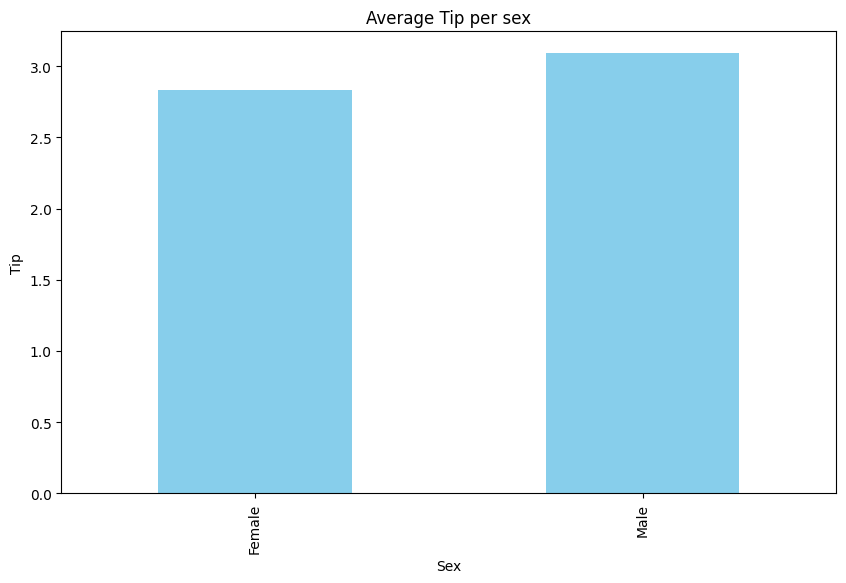

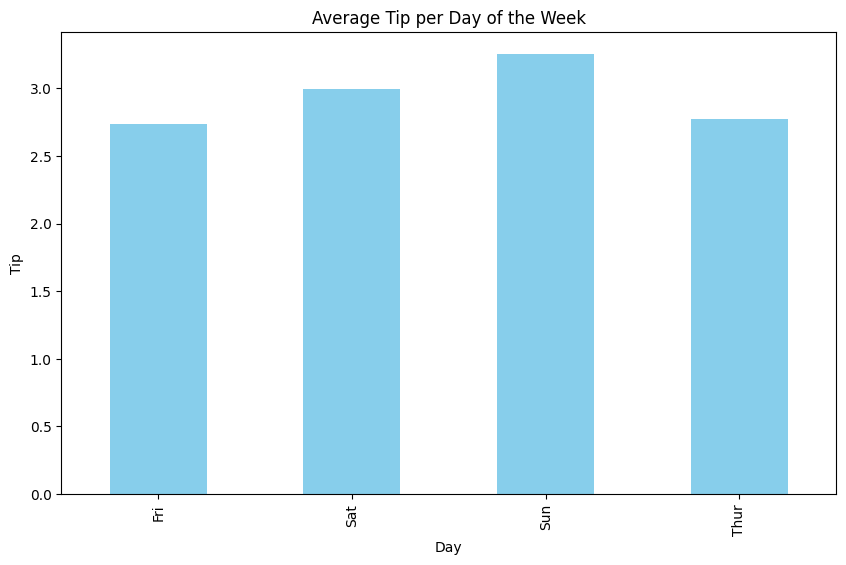

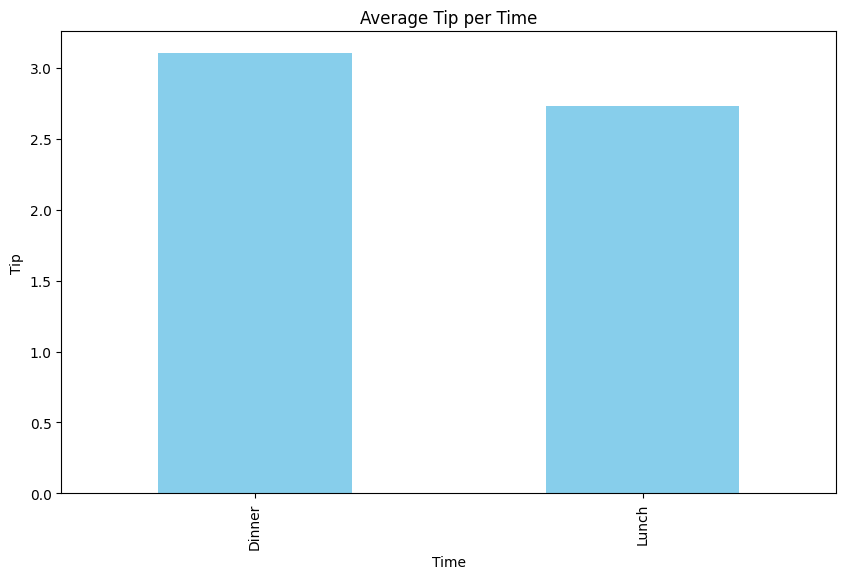

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()

mean_tip_per_day = df.groupby('day')['tip'].mean()

mean_tip_by_time = df.groupby('time')['tip'].mean()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


print(df.head())

In [3]:
source ~/Desktop/AI/myenv/bin/activate

SyntaxError: invalid syntax (2394945060.py, line 1)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


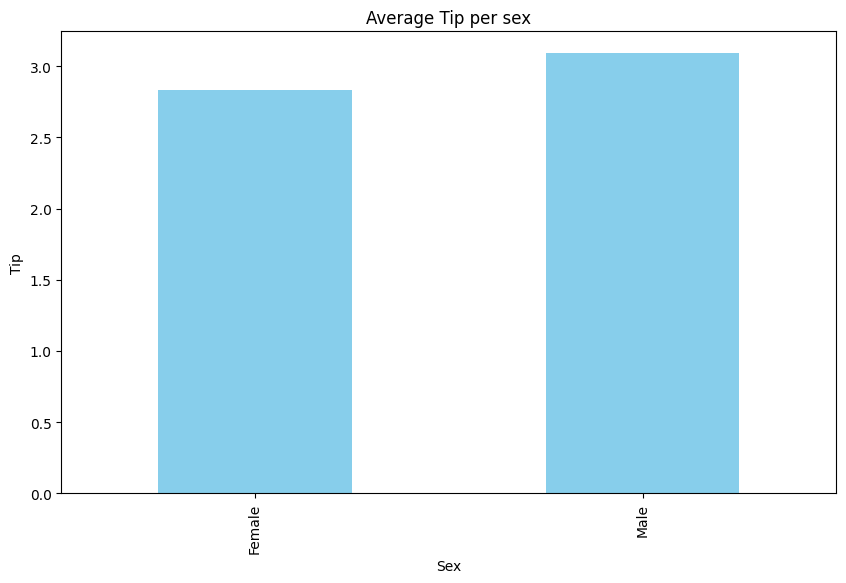

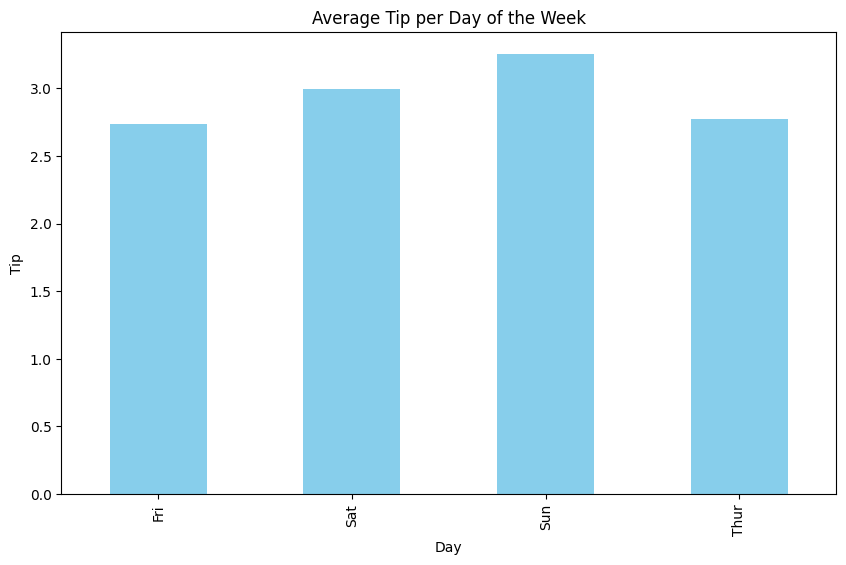

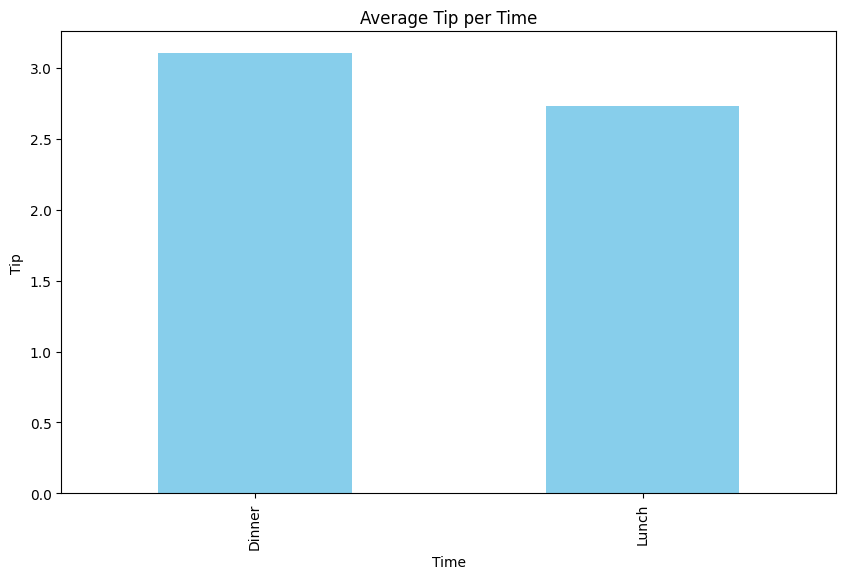

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()

mean_tip_per_day = df.groupby('day')['tip'].mean()

mean_tip_by_time = df.groupby('time')['tip'].mean()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


print(df.head())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


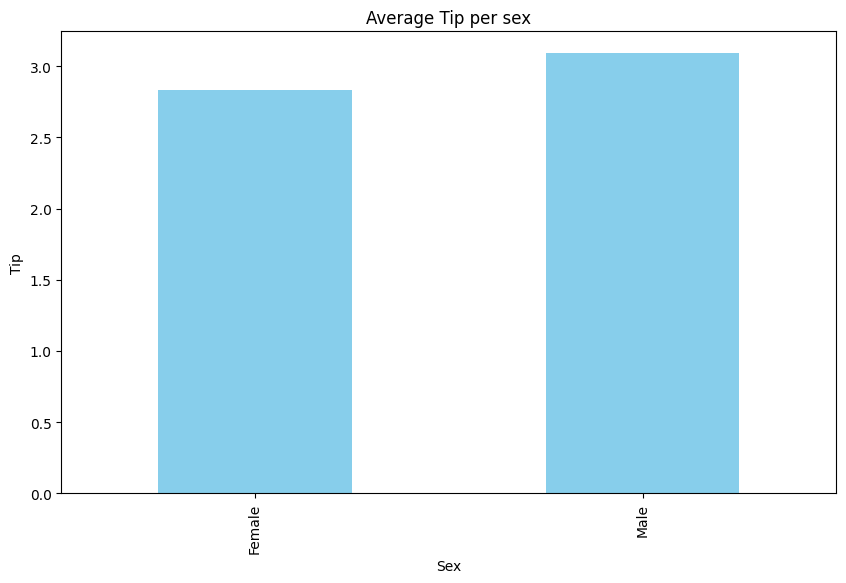

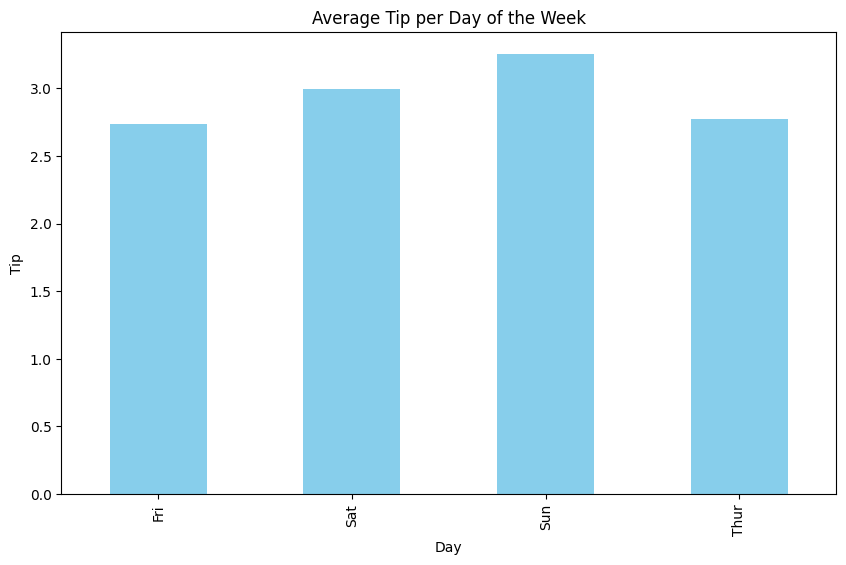

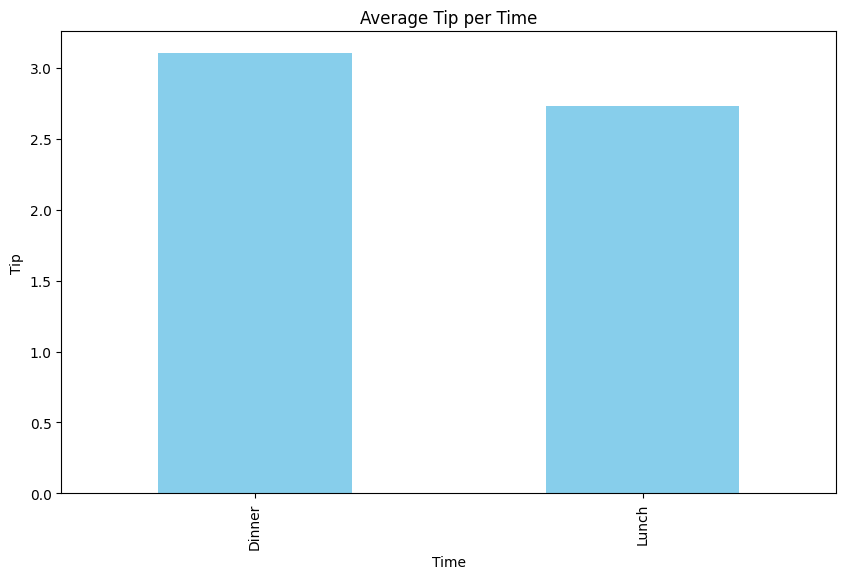

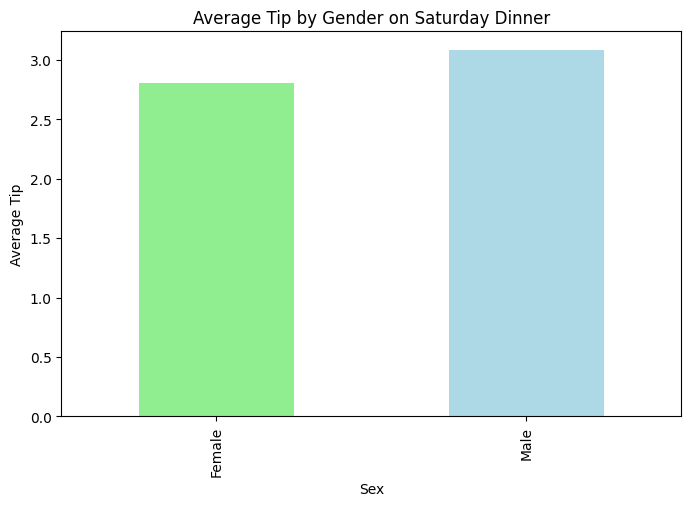

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()
median_tip_by_sex = df.groupby('sex')['tip'].median()

mean_tip_per_day = df.groupby('day')['tip'].mean()
median_tip_per_day = df.groupby('day')['tip'].median()

mean_tip_by_time = df.groupby('time')['tip'].mean()
median_tip_by_time = df.groupby('time')['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]

#محاسبه میانگین انعام بر اساس جنسیت
mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.show()

print(df.head())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


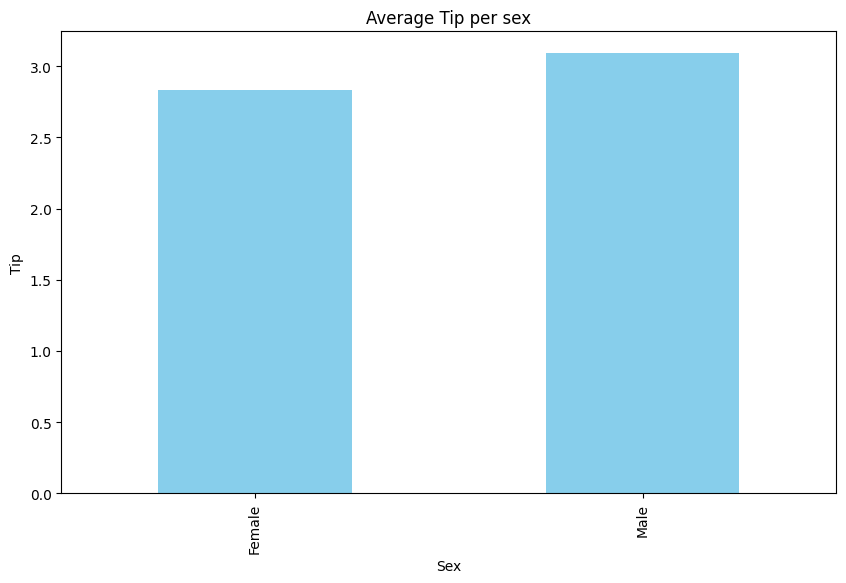

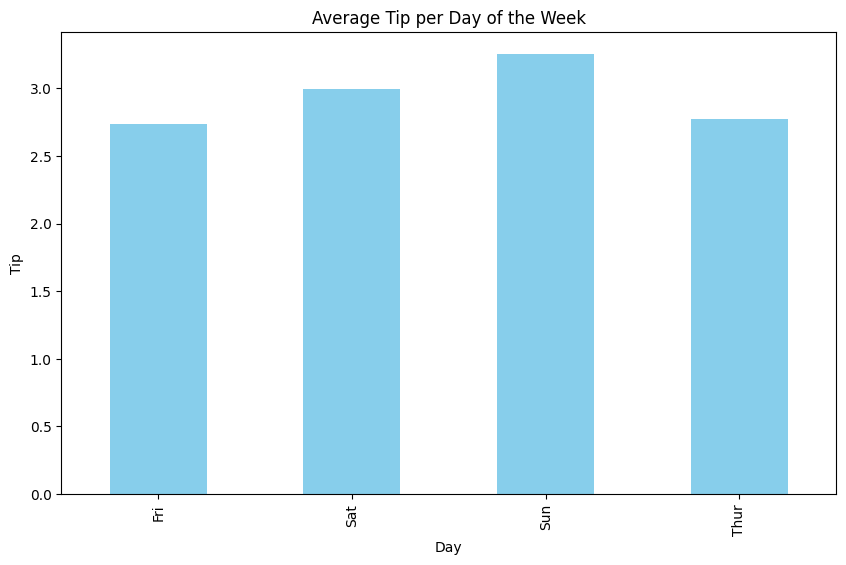

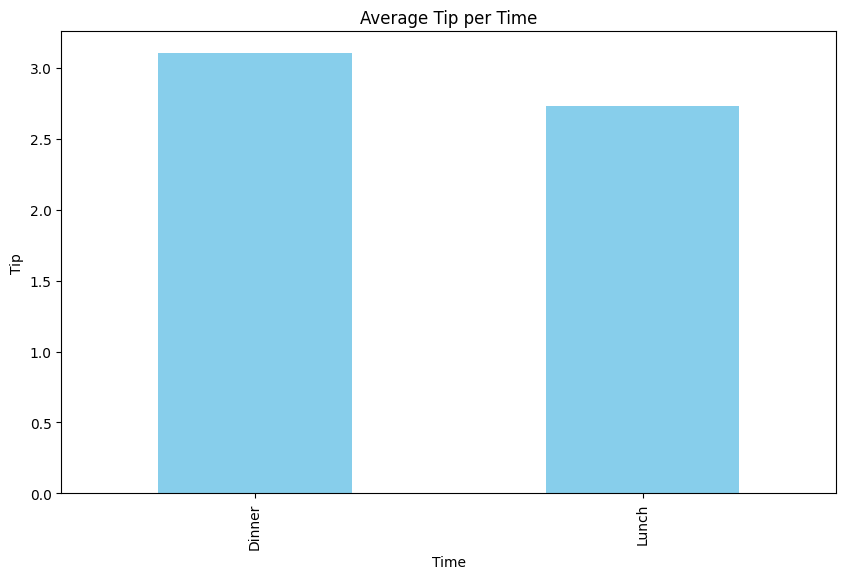

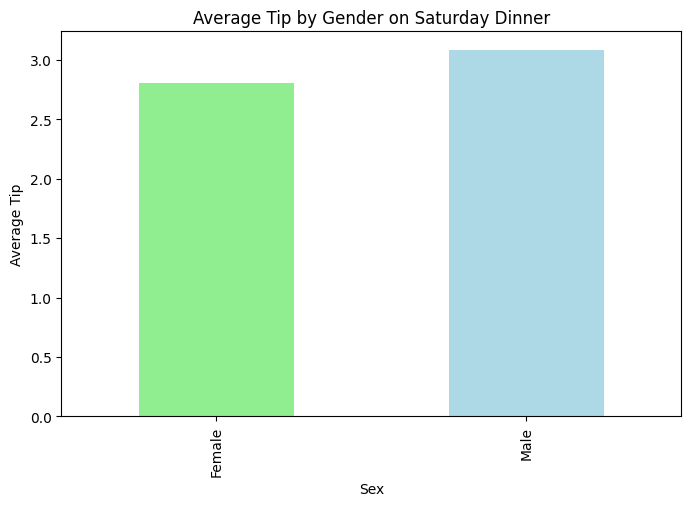

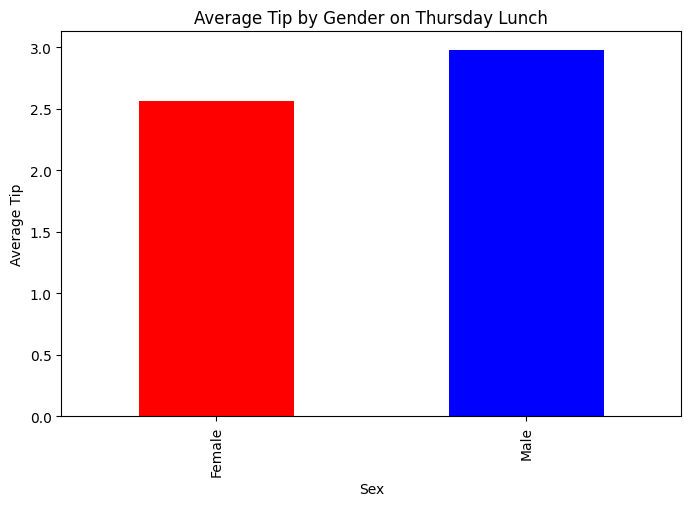

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()
median_tip_by_sex = df.groupby('sex')['tip'].median()

mean_tip_per_day = df.groupby('day')['tip'].mean()
median_tip_per_day = df.groupby('day')['tip'].median()

mean_tip_by_time = df.groupby('time')['tip'].mean()
median_tip_by_time = df.groupby('time')['tip'].median()

mean_tip_by_size = df.groupby('size')['tip'].mean()
median_tip_by_size = df.groupby('size')['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_size = df.groupby('size')['tip'].mean().plot(kind='bar', color='orange')
plt.title('Mean tip by size')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.show()

plt.figure(figsize=(8, 5))
mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.show()

print(df.head())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


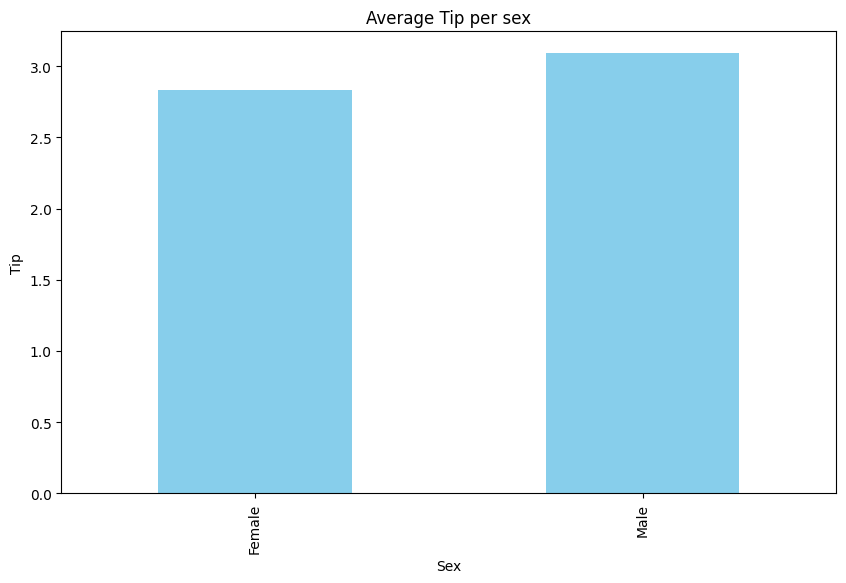

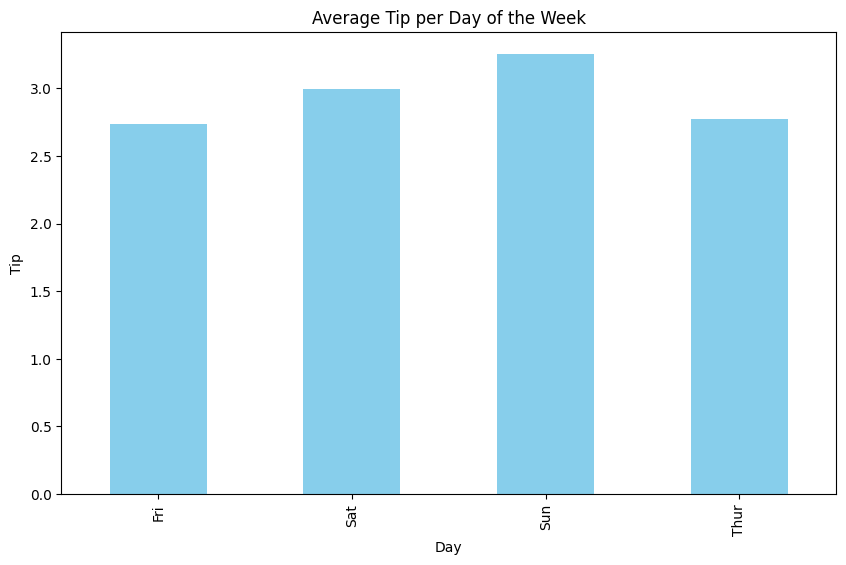

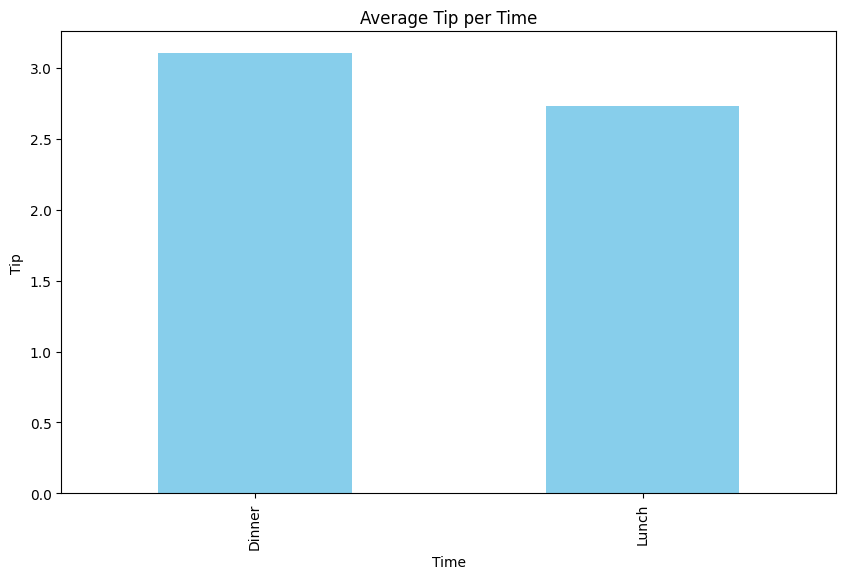

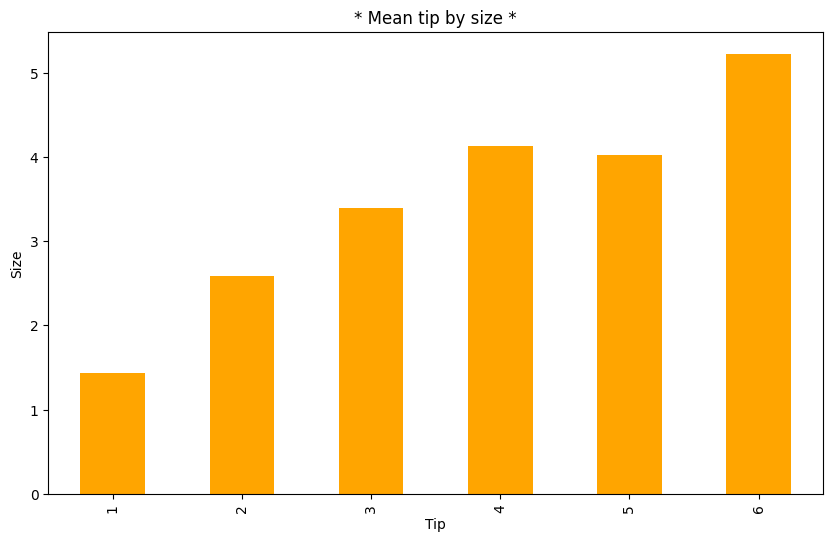

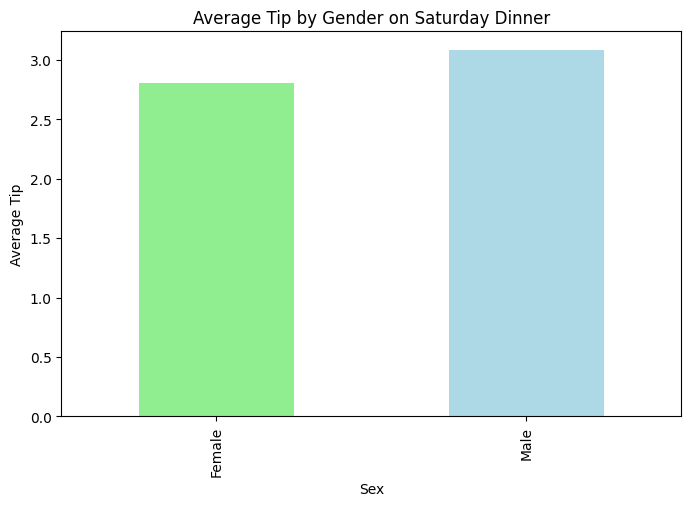

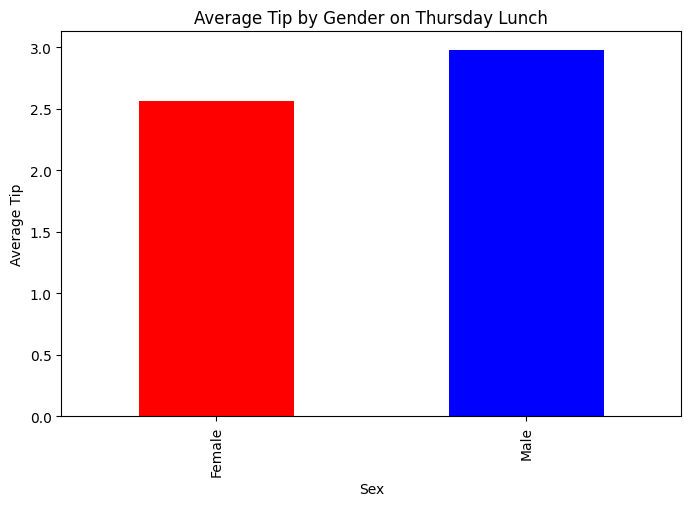

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()
median_tip_by_sex = df.groupby('sex')['tip'].median()

mean_tip_per_day = df.groupby('day')['tip'].mean()
median_tip_per_day = df.groupby('day')['tip'].median()

mean_tip_by_time = df.groupby('time')['tip'].mean()
median_tip_by_time = df.groupby('time')['tip'].median()

mean_tip_by_size = df.groupby('size')['tip'].mean()
median_tip_by_size = df.groupby('size')['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_size = df.groupby('size')['tip'].mean().plot(kind='bar', color='orange')
plt.title('* Mean tip by size *')
plt.xlabel('Tip')
plt.ylabel('Size')
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.show()

plt.figure(figsize=(8, 5))
mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.show()

print(df.head())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


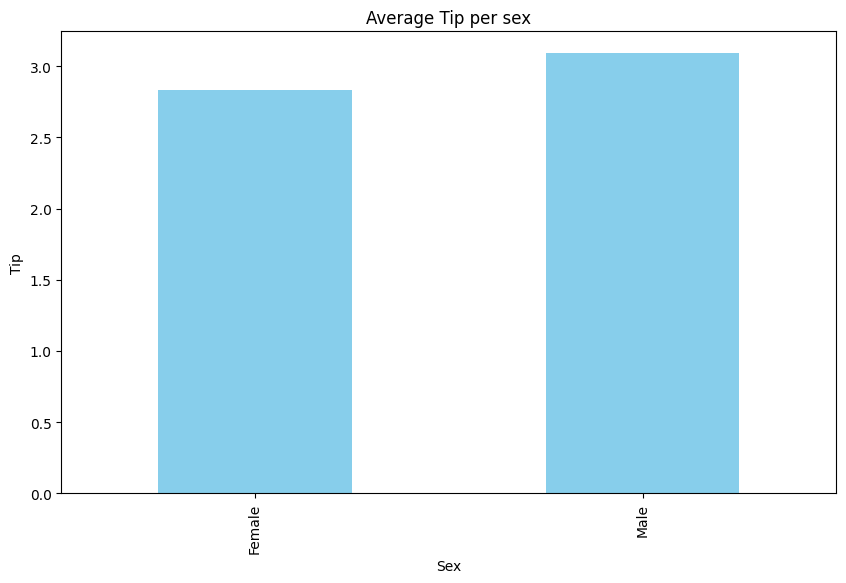

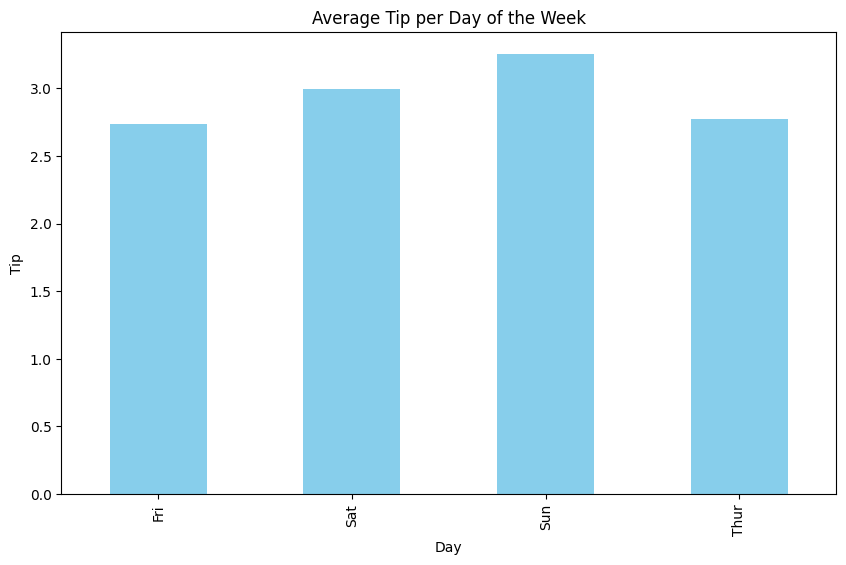

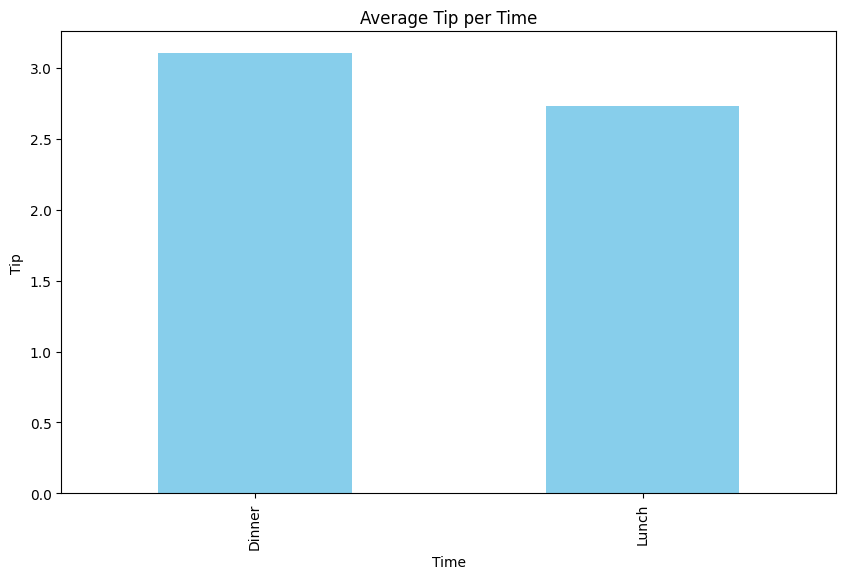

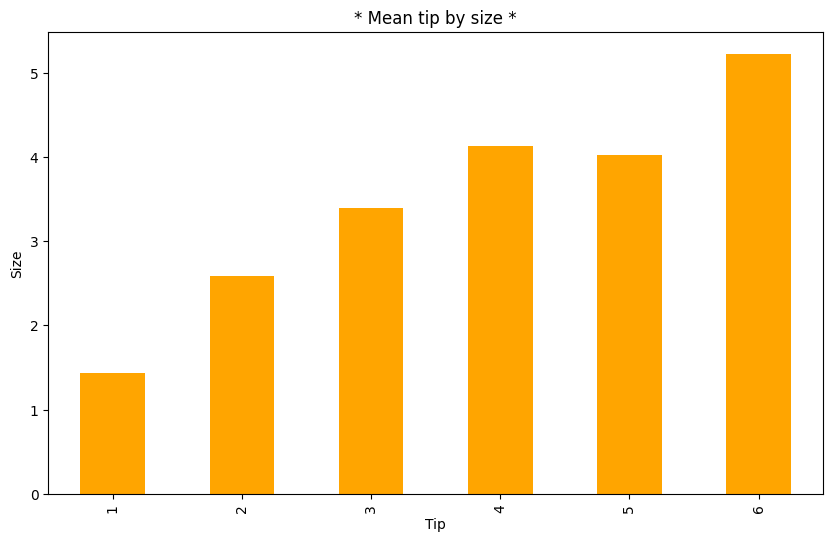

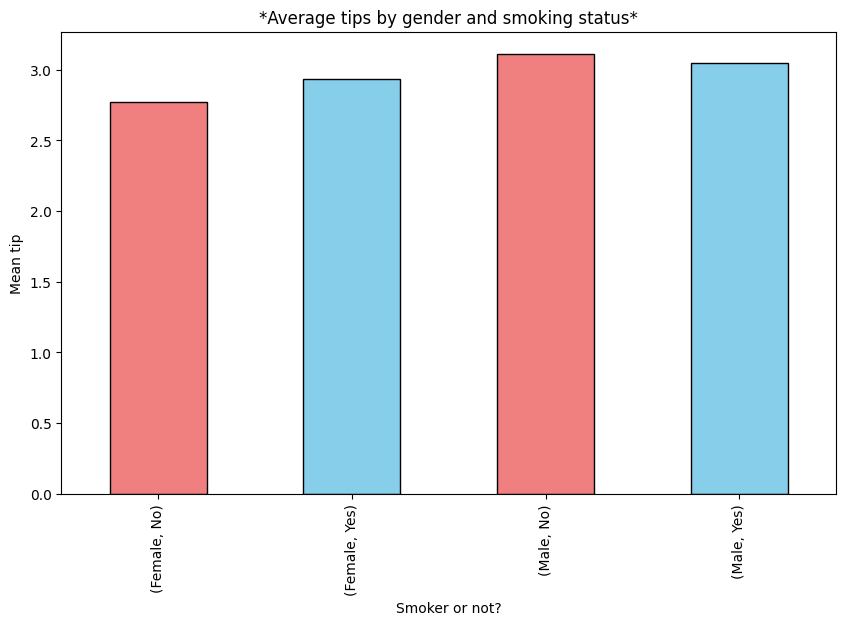

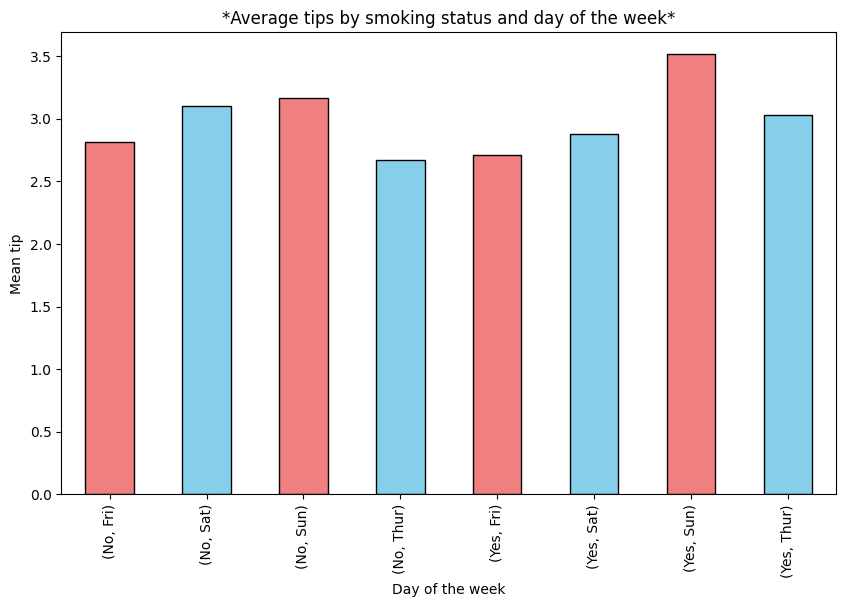

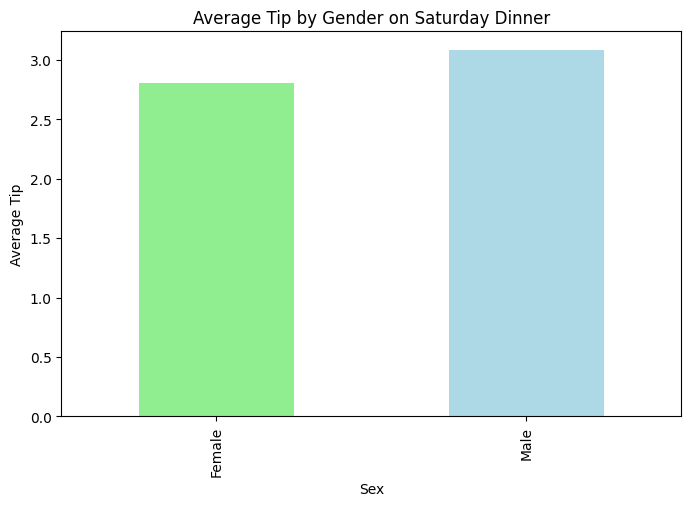

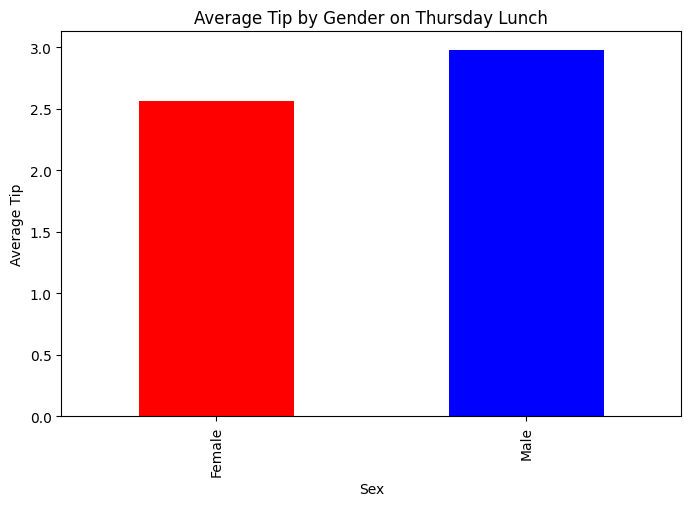

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
mean_tip_by_sex = df.groupby('sex')['tip'].mean()
median_tip_by_sex = df.groupby('sex')['tip'].median()

mean_tip_per_day = df.groupby('day')['tip'].mean()
median_tip_per_day = df.groupby('day')['tip'].median()

mean_tip_by_time = df.groupby('time')['tip'].mean()
median_tip_by_time = df.groupby('time')['tip'].median()

mean_tip_by_size = df.groupby('size')['tip'].mean()
median_tip_by_size = df.groupby('size')['tip'].median()

mean_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].mean()
median_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].median()

mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean()
median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_per_size = df.groupby('size')['tip'].mean().plot(kind='bar', color='orange')
plt.title('* Mean tip by size *')
plt.xlabel('Tip')
plt.ylabel('Size')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_by_sex_smoker.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by gender and smoking status*')
plt.xlabel('Smoker or not?')
plt.ylabel('Mean tip')
plt.show()

plt.figure(figsize=(10, 6))
mean_tip_by_smoker_day.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by smoking status and day of the week*')
plt.xlabel('Day of the week')
plt.ylabel('Mean tip')
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.show()

plt.figure(figsize=(8, 5))
mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.show()

print(df.head())
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna('0', inplace=True)

#برچسب مقدار روی ستون ها
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
sorted_mean_tip_by_sex = df.groupby('sex')['tip'].mean().sort_values()
sorted_median_tip_by_sex = df.groupby('sex')['tip'].median()

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_mean_tip.plot(kind='bar')
median_tip_per_day = df.groupby('day')['tip'].median()

mean_tip_by_time = df.groupby('time')['tip'].mean()
median_tip_by_time = df.groupby('time')['tip'].median()

mean_tip_by_size = df.groupby('size')['tip'].mean()
median_tip_by_size = df.groupby('size')['tip'].median()

mean_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].mean()
median_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].median()

mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean()
median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
ax = mean_tip_per_sex = df.groupby('sex')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_per_day = df.groupby('day')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_per_time = df.groupby('time')['tip'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_per_size = df.groupby('size')['tip'].mean().plot(kind='bar', color='orange')
plt.title('* Mean tip by size *')
plt.xlabel('Tip')
plt.ylabel('Size')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_by_sex_smoker.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by gender and smoking status*')
plt.xlabel('Smoker or not?')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = mean_tip_by_smoker_day.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by smoking status and day of the week*')
plt.xlabel('Day of the week')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
ax = mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(8, 5))
ax = mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()



print(df.head())
plt.tight_layout()
plt.show()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


NameError: name 'sorted_mean_tip' is not defined

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


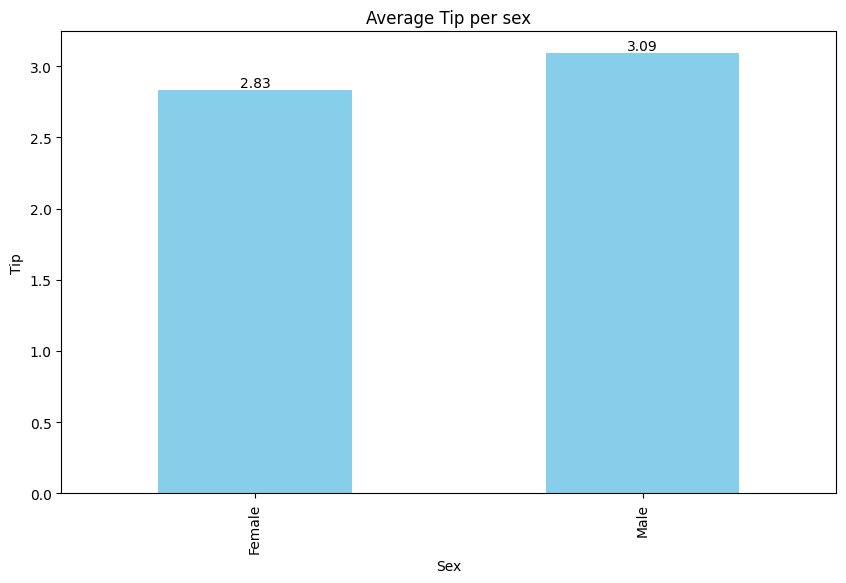

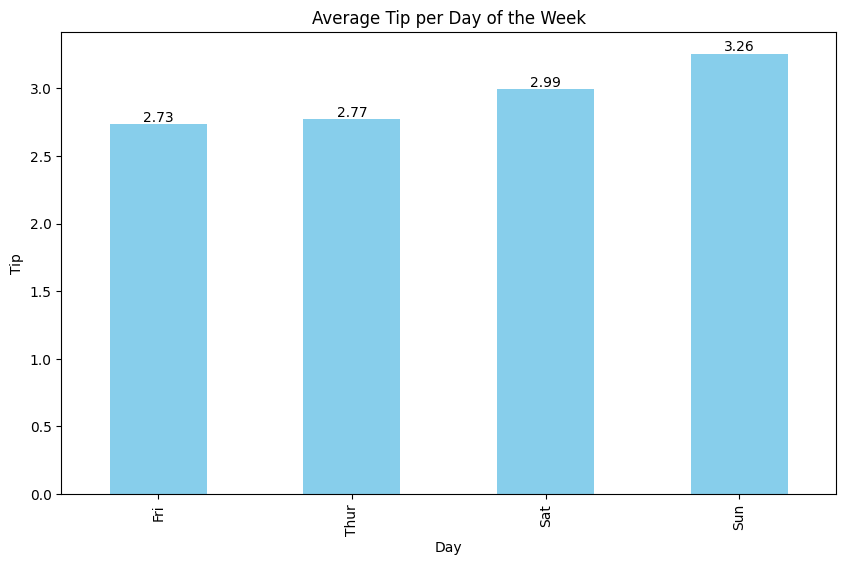

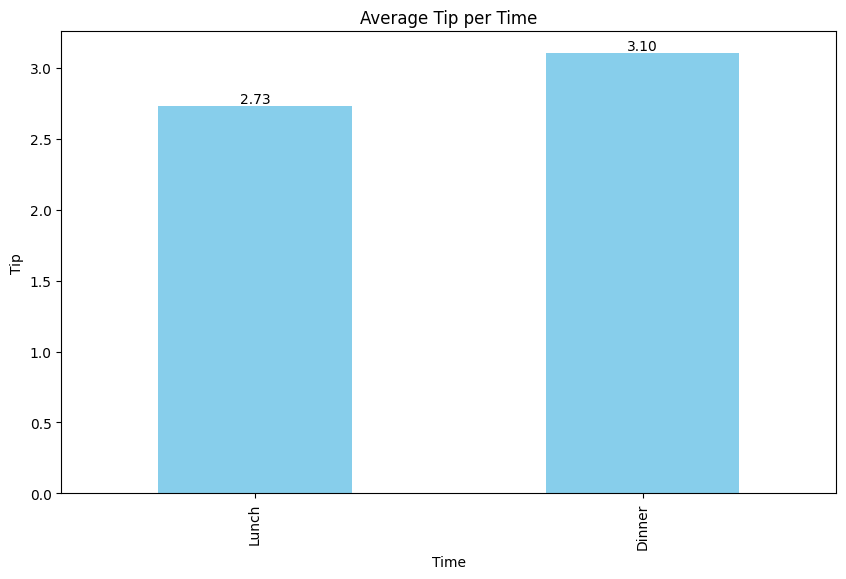

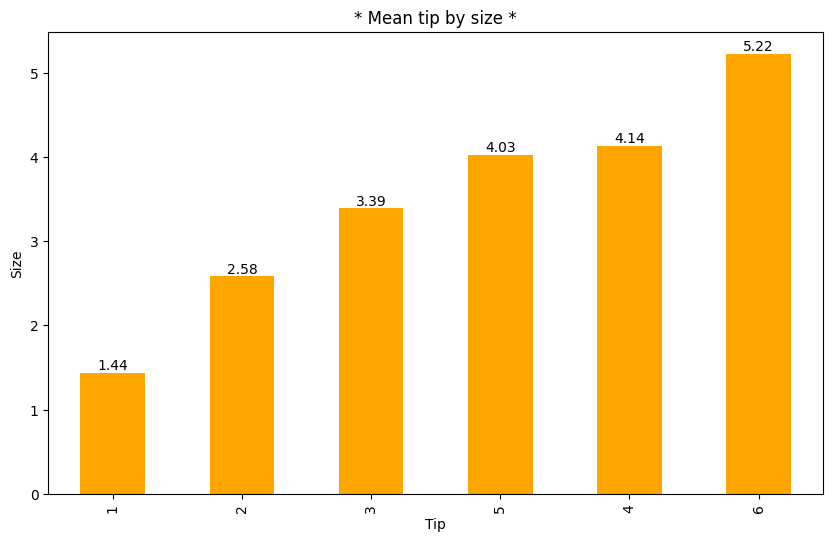

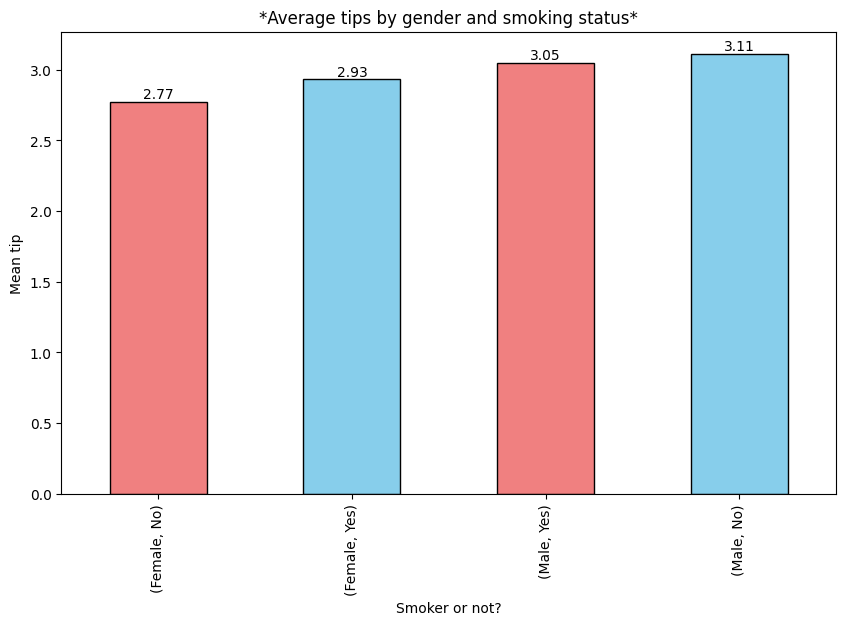

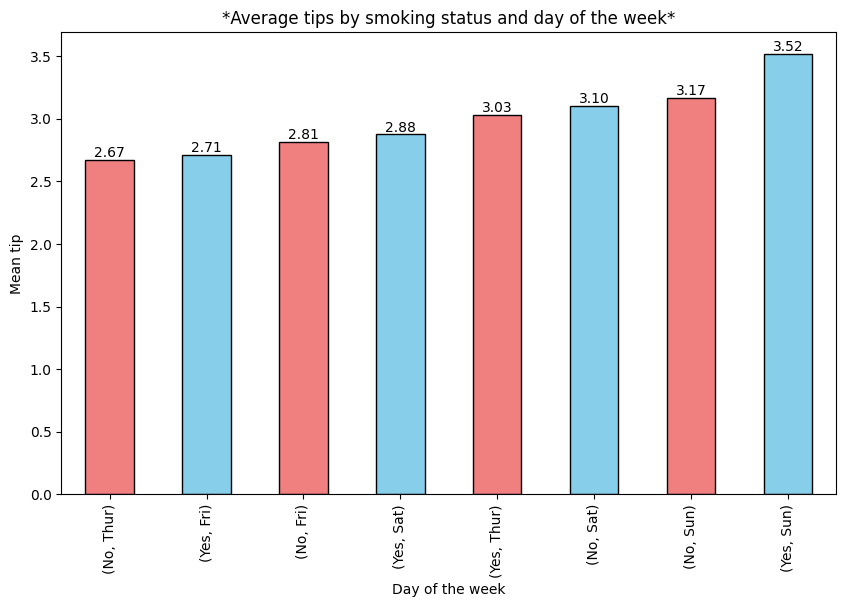

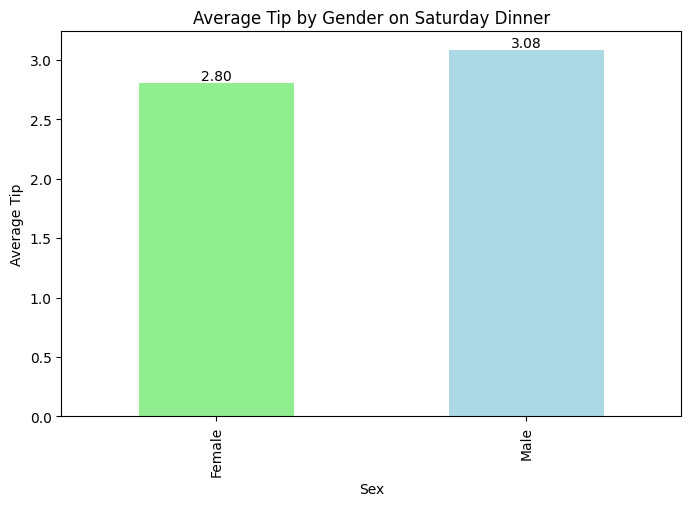

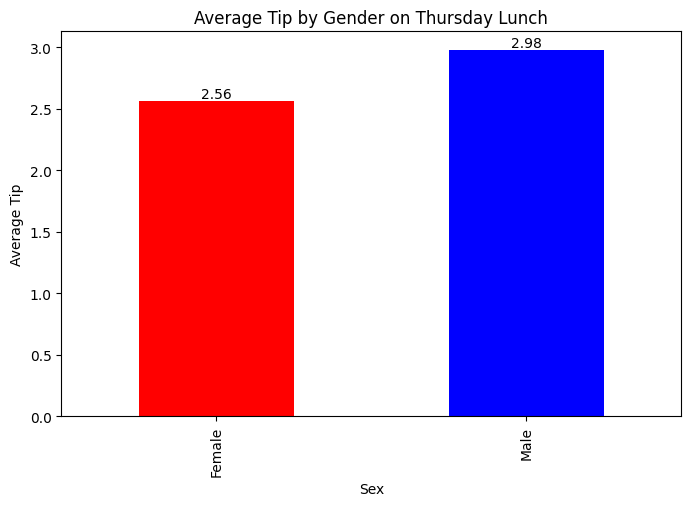

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna(0, inplace=True)

#برچسب مقدار روی ستون ها
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
sorted_mean_tip_by_sex = df.groupby('sex')['tip'].mean().sort_values()
sorted_median_tip_by_sex = df.groupby('sex')['tip'].median()

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_median_tip_per_day = df.groupby('day')['tip'].median()

sorted_mean_tip_by_time = df.groupby('time')['tip'].mean().sort_values()
sorted_median_tip_by_time = df.groupby('time')['tip'].median()

sorted_mean_tip_by_size = df.groupby('size')['tip'].mean().sort_values()
sorted_median_tip_by_size = df.groupby('size')['tip'].median()

sorted_mean_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].mean().sort_values()
sorted_median_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].median()

sorted_mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean().sort_values()
sorted_median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_sex.plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_time.plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_size.plot(kind='bar', color='orange')
plt.title('* Mean tip by size *')
plt.xlabel('Tip')
plt.ylabel('Size')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_sex_smoker.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by gender and smoking status*')
plt.xlabel('Smoker or not?')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_smoker_day.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by smoking status and day of the week*')
plt.xlabel('Day of the week')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
sorted_mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
sorted_mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
ax = sorted_mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(8, 5))
ax = sorted_mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()



print(df.head())
plt.tight_layout()
plt.show()